<a href="https://colab.research.google.com/github/Anuka04/Machine-Learning-aided-Flood-Forecasting/blob/main/Flood_xg_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/FINAL FINAL FINAL FINAL DATASET WITH DATES.csv',index_col='Date', parse_dates=True)
dataset.index.freq="MS"
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X

array([[2.34000000e+01, 3.81000000e+01, 3.34011077e+08, 1.72360000e+01],
       [2.32000000e+01, 4.08000000e+01, 3.34011077e+08, 2.03750000e+01],
       [1.56900000e+02, 1.79100000e+02, 3.34011077e+08, 2.31520000e+01],
       ...,
       [6.26000000e+01, 6.26000000e+01, 1.32286650e+09, 2.45750000e+01],
       [1.40000000e+01, 1.40000000e+01, 1.32286650e+09, 2.79810000e+01],
       [1.52000000e+01, 1.52000000e+01, 1.32286650e+09, 3.10140000e+01]])

## Training XGBoost on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110  10]
 [  9  87]]


0.9120370370370371

## Plotting output

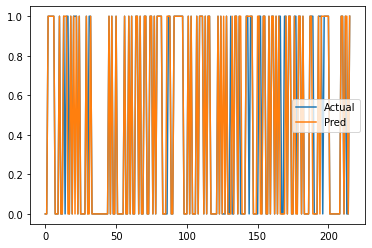

In [ ]:
import matplotlib.pyplot as plt
F = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
plt.plot(F[:,0], label="Actual")
plt.plot(F[:,1], label="Pred")
plt.legend()
plt.rcParams['figure.figsize'] = (10, 7)
plt.show()